# Acetone-Chloroform Mixture

Here we calculate the activity and activity coefficients in an acetone-chloroform mixture.
This is inspired by KFKA05's kompendium exercise **K16.3**.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 16, 'figure.figsize': [3.0, 2]})

## Activity and activity coefficient

Selecting pure acetone as the reference state we get that the activity is $a = p / p^* = \gamma x$. In the limit $x\rightarrow 1$ this reference state becomes problematic since we divide by zero and get non-a-number, `nan`, for the activity coefficient.

In [5]:
x = np.array([0, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0]) # mole fractions
p = np.array([0, 13, 38, 103, 186, 273, 351])   # partial pressures
a = p / p[-1] # activities
gamma = a / x # activity coefficients
print("a_aceton = ", a)
print("𝛾_aceton = ", gamma)

a_aceton =  [0.         0.03703704 0.10826211 0.29344729 0.52991453 0.77777778
 1.        ]
𝛾_aceton =  [       nan 0.37037037 0.54131054 0.73361823 0.88319088 0.97222222
 1.        ]


/var/folders/q8/__l974fj6tv9gwyvvzb0w8x80000gn/T/ipykernel_34275/1325886925.py:4: RuntimeWarning: invalid value encountered in divide
  gamma = a / x # activity coefficients


To fix this, we use Henry's law, $p_j = k_{H,j} x_j$ which is valid when the mole fraction, $x_j$ of the solute (now acetone) is very low. Combining with $p_j = \gamma_j x_j p_j^*$ we get that,
$$
\lim_{x_j \rightarrow 0} \gamma_j = \frac{k_{H,j}}{p_j^*}
$$
The Henry's law constant, $k_H$ can be obtained from the plot below by estimating the slope of $p_{aceton}(x)$ near $x_{aceton}=0$. We here just do that using the two first points of the dataset. Next we calculate the activity coefficient at infinite acetone dilution.

In [6]:
kH = (p[1] - p[0]) / (x[1] - x[0]) # torr
print(f'kH               = {kH} torr')
print(f"𝛾_aceton for x→0 = {kH / p[-1]:.2}")

kH               = 130.0 torr
𝛾_aceton for x→0 = 0.37


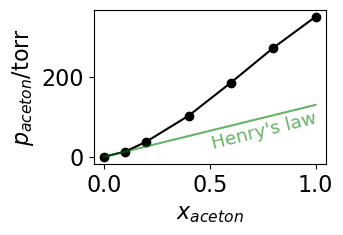

In [7]:
plt.plot(x, p, 'ko-')
plt.plot(x, kH * x, alpha=0.6, color='g')
plt.xlabel('$x_{aceton}$')
plt.ylabel('$p_{aceton}$/torr')
plt.text(0.5, 20, "Henry's law", rotation=14, fontsize='small', alpha=0.6, color='g')
plt.show()